# Exercises

## Exercise 1
---
Determine the effect of stimulus sequence duration on RF estimates. To do this, repeat the above steps for different durations (5 s, 10 s, 20 s, 40 s, 80 s, 160 s, 320 s, 640 s). Compute the Pearson correlation between true and estimated RFs for each duration to quantify the accuracy of the estimator. The Pearson correlation $\mathrm{cc}$ is defined as
$$
\mathrm{cc} = \frac{\mathbf{k}_\mathrm{true}^T \hat{\mathbf{k}}}{\lVert \mathbf{k}_\mathrm{true} \rVert \lVert \hat{\mathbf{k}} \rVert}
$$
where $\lVert \cdot \rVert$ is the L2-norm (vector length).
As the response generation process is stochastic, compute the average correlation across 10 realizations for the same duration and plot the average correlation as a function of duration. How is the recording duration related to the ability to recover the true RF? 

In [ ]:
## Calculate the Pearson correlation cc
for duration in durations:
    cc = np.dot(K.T,K_hat)/(np.linalg.norm(K)*np.linalg.norm(K_hat))

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

sns.set_theme(context='notebook',style='white',font_scale=1.5,
              rc = {'axes.spines.top':False,'axes.spines.right':False})

In [20]:
## Parameters
durations = [5.,10.,20.,40.,80.,160.,320.,640.]
dt = .1
std_dev = 1
vf_size = (15,15)
mu = (8, 8) # center of the gabor pathc
sigma = (4,4) #size of the gabor patch
angle = 45 # orientation of the gabor patch
frequency = .085 # spatial frequency of the gabor patch
phase = 0 # pahse of the gabor pathc
noise_variance = 1
offset = 2.

In [21]:
## Generate the real receptive field

# Create meshgrid
xx, yy = np.meshgrid(1. + np.arange(vf_size[0]), 1. + np.arange(vf_size[1]))

# Gaussian envelope
G = np.exp(- np.power(xx - mu[0], 2) / (2. * sigma[0]) - np.power(yy - mu[1], 2) / (2. * sigma[1]))

# spatial modulation
phi = np.deg2rad(angle)
xxr = xx * np.cos(phi)
yyr = yy * np.sin(phi)
xyr = (xxr + yyr) * 2. * np.pi * 2. * frequency
Sn = np.cos(xyr + phase)

# Real receptive field
K = G * Sn
K /= np.amax(np.abs(K))

In [22]:
# flatten the matrices in to 1d array for convenience
K_flat = K.ravel()
K_flat = np.hstack((K.flat, offset))

In [75]:
pearson_cor = []
for duration in durations:
    all_cc = []
    # Create bins
    n_bins = round(duration / float(dt))
    
    # Compute the estimate for each duration 10 times and average
    for i in range(10):
        # Create the stimulus design matrix
        S = std_dev * np.random.randn(n_bins,vf_size[0],vf_size[1])
    
        # Flatten the stimulus matrix
        S_flat = S.reshape(S.shape[0],S.shape[1]*S.shape[2])
        S_flat = np.hstack((S_flat, np.ones((n_bins, 1))))  

        # 1. linear stage
        ks = np.dot(K_flat, S_flat.T)

        # 2. nonlinear stage (for a linear model: f -> identity function)
        rate = ks

        # add Gaussian noise centered around the "true" rate for each bin
        rate = rate + np.sqrt(noise_variance) * np.random.randn(n_bins)

        # Estimated receptive field
        K_hat = np.linalg.pinv(S_flat.T @ S_flat) @ (S_flat.T @ rate)
        K_hat = K_hat[:-1].reshape(vf_size)
    
        cc = np.dot(K.T,K_hat)/(np.linalg.norm(K)*np.linalg.norm(K_hat))
        all_cc.append(cc)
    pearson_cor.append(np.sum(all_cc))
        
    print('The pearson correlation after %s s is %s'%(duration,np.sum(all_cc)/10))

The pearson correlation after 5.0 s is 0.20315551213696875
The pearson correlation after 10.0 s is 0.45832203181091263
The pearson correlation after 20.0 s is 0.5505641135000419
The pearson correlation after 40.0 s is 0.7228779186542674
The pearson correlation after 80.0 s is 0.7533458790483162
The pearson correlation after 160.0 s is 0.742155524286009
The pearson correlation after 320.0 s is 0.7559548899674942
The pearson correlation after 640.0 s is 0.7630745451835158


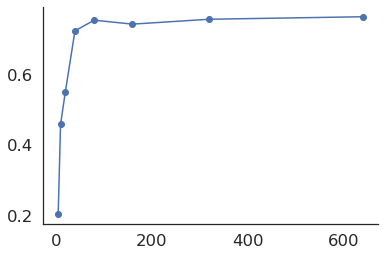

The pearson correlation has a exponentially saturating correlation


In [81]:
plt.plot(durations,np.array(pearson_cor)/10,'-o')
plt.show()
print('The pearson correlation has a exponentially saturating correlation')

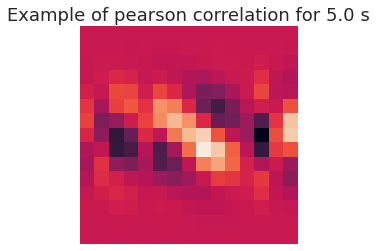

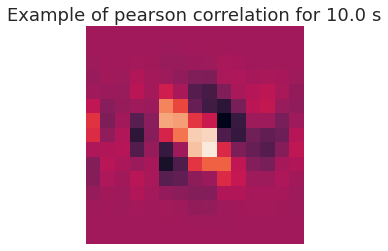

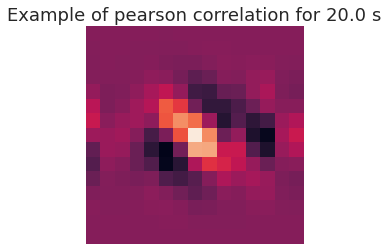

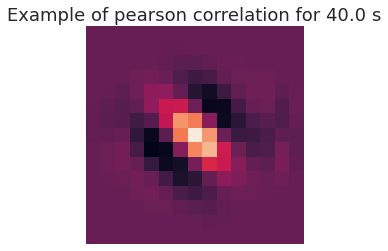

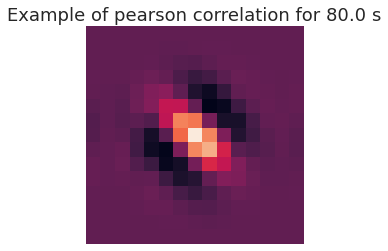

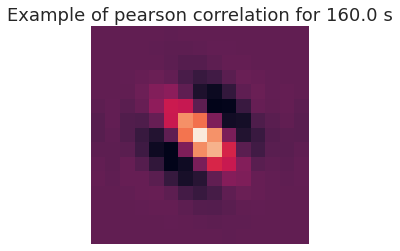

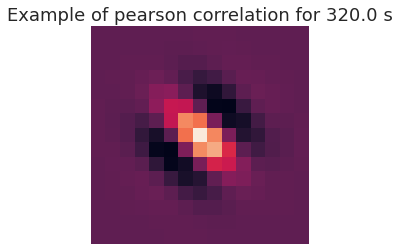

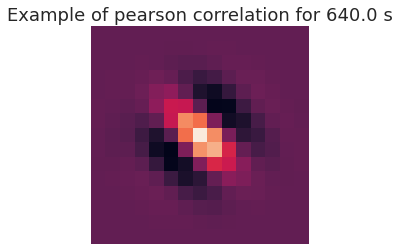

In [74]:
## A pearson correlation plot for each duration to show how the correlation evolves over time
for duration in durations:
    # Create bins
    n_bins = round(duration / float(dt))
    
    # Create the stimulus design matrix
    S = std_dev * np.random.randn(n_bins,vf_size[0],vf_size[1])

    # Flatten the stimulus matrix
    S_flat = S.reshape(S.shape[0],S.shape[1]*S.shape[2])
    S_flat = np.hstack((S_flat, np.ones((n_bins, 1))))  

    # 1. linear stage
    ks = np.dot(K_flat, S_flat.T)

    # 2. nonlinear stage (for a linear model: f -> identity function)
    rate = ks

    # add Gaussian noise centered around the "true" rate for each bin
    rate = rate + np.sqrt(noise_variance) * np.random.randn(n_bins)

    # Estimated receptive field
    K_hat = np.linalg.pinv(S_flat.T @ S_flat) @ (S_flat.T @ rate)
    K_hat = K_hat[:-1].reshape(vf_size)

    cc = np.dot(K.T,K_hat)/(np.linalg.norm(K)*np.linalg.norm(K_hat))
    
    plt.imshow(np.array(cc)/10)
    plt.axis('off')
    plt.title('Example of pearson correlation for %s s'%duration)
    plt.show()

As the recording time increases, the estimated RF and real RF start to correlate more. 
The pearson correlation increases and the corresponding images become sharper.

## Exercise 2
---
Determine the effect of response noise ($\sigma^2$) on RF estimates. Try different value for the noise variance in the simulations, e.g., 0, 2, 4, 6, 8, and 10 for a duration of 100 s. As in the previous excercise, repeatedly estimate RF parameters for each condition (10 times) but this time also plot the standard deviation of the correlations across the different runs for each condition.

## Exercise 3
---
Look at the analytical derivation of the log-likelihood for the poisson GLM.
Which of the terms are required for maximizing the likelihood with respect to $\mathbf{k}$ and which terms can be ignored? **Note:** due to the independence of spikes in the different bins, the likelihood can be written as $P(R | S, \mathbf{k}) = \prod_t^T P(r_t | \mathbf{s}_t, \mathbf{k})$. The log turns the product into a sum which makes life much easier. 




## Exercise 4
---
Explore the effect of the data duration and the firing rate on the goodness of fit of the Poisson GLM.

A - Generate data with durations of 10,20,50,100 and 200 seconds. Fit the model on each dataset and plot the fitted parameters.
Use the pearson correlation as a proxy of the goodness of fit, and plot it as a function of the duration of the data.

B - Fix the duration to 100s, and change the average firing rate of the simulation. How does the fit perform for different firing rates? 